# CS5228-KDDM, 2025/26-2, Coursework 1

### Introduction
Data preprocessing is a critical foundational step in the data mining pipeline, as real-world datasets frequently contain noise, missing values, and inconsistencies that can negatively impact downstream analysis and modeling. In this task, we work with the census-94-1.csv dataset, which contains demographic records from the 1994 US Census.

The primary objective of this section is to sanitize the raw data by enforcing domain constraints provided in the dataset description. This process involves:


* Handling Missing Data: Identifying and removing records with missing or undefined values.


* Filtering Dirty Data: Verifying that numerical attributes (such as Age, Hours-per-week, etc.) adhere to their specified valid ranges and removing records that violate these constraints.


* Distribution Analysis: Specifically examining the Capital Gain and Capital Loss attributes using histograms to understand their statistical distribution and sparsity compared to other variables.

The final output of this process will be a clean dataset, saved as result1-1.csv, which serves as the reliable input for subsequent transformation and clustering tasks.

#### Student Name: MA YUCHEN
#### Student Number: A0327384X

### CW1, Part 1: Data Preprocessing using Python (2+2=4 marks)

### CW1-1-1: Data Cleaning (2 marks)
#### Datasets: census-94-1.csv ### CW1, Part 1: Data Preprocessing using Python (2+2=4 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def clean_data():
    # 1. Define Columns
    columns = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'
    ]

    # 2. Load Data
    df = pd.read_csv('census-94-1.csv', header=None, names=columns, 
                     skipinitialspace=True, na_values='?')
    
    print(f"Original data Rows: {len(df)}")
    
    # 3. Missing Data
    original_count = len(df)
    df_clean = df.dropna()
    missing_removed_count = original_count - len(df_clean)
    print(f"Missing Data Rows: {missing_removed_count}")

    # 4. Dirty Data
    # - age: 17 - 90
    # - education-num: 1-16
    # - fnlwgt: 12,285 - 1,484,705  
    # - hours-per-week: 1 - 99
    # - capital-gain: 0 - 99,999
    # - capital-loss: 0 - 4,356
    
    mask_dirty = (
        (~df_clean['age'].between(17, 90)) |
        (~df_clean['education-num'].between(1, 16)) |
        (~df_clean['fnlwgt'].between(12285, 1484705)) |  
        (~df_clean['hours-per-week'].between(1, 99)) |
        (~df_clean['capital-gain'].between(0, 99999)) |
        (~df_clean['capital-loss'].between(0, 4356))
    )
    
    dirty_count = mask_dirty.sum()
    
    if dirty_count > 0:
        print(f"\n Dirty Data Rows: {dirty_count}")
        
        # Categorical statistics
        print(f" - Age: {(~df_clean['age'].between(17, 90)).sum()}")
        print(f" - Age: {(~df_clean['education-num'].between(1, 16)).sum()}")
        print(f" - Final Weight: {(~df_clean['fnlwgt'].between(12285, 1484705)).sum()}")
        print(f" - Hours-per-week: {(~df_clean['hours-per-week'].between(1, 99)).sum()}")
        print(f" - Capital-gain: {(~df_clean['capital-gain'].between(0, 99999)).sum()}")
        print(f" - Capital-loss: {(~df_clean['capital-loss'].between(0, 4356)).sum()}")
        
        df_clean = df_clean[~mask_dirty]
    else:
        print("All continuous variables are in the range")

    # 5. Typo Correction
    df_clean = df_clean.copy()
    jamaika_count = (df_clean['native-country'] == 'Jamaika').sum()
    mexiko_count = (df_clean['native-country'] == 'Mexiko').sum()
    total_corrected = jamaika_count + mexiko_count
    df_clean['native-country'] = df_clean['native-country'].replace({
    'Jamaika': 'Jamaica',
    'Mexiko': 'Mexico'})

    print(f"Spelling Error Data Rows: {total_corrected}")

    # 6. Save result
    print(f"\nClean Data Rows: {len(df_clean)}")
    df_clean.to_csv('result1-1.csv', index=False)
    print("Save the Data to 'result1-1.csv'")

    return df_clean

In [9]:
def analyze_capital(df):
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Capital Gain
    sns.histplot(df['capital-gain'], bins=50, kde=False, color='skyblue', ax=axes[0])
    axes[0].set_title('Histogram of Capital Gain')
    axes[0].set_xlabel('Capital Gain')
    axes[0].set_ylabel('Frequency')
    
    # Capital Loss
    sns.histplot(df['capital-loss'], bins=50, kde=False, color='salmon', ax=axes[1])
    axes[1].set_title('Histogram of Capital Loss')
    axes[1].set_xlabel('Capital Loss')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

    # Statistic 
    total = len(df)
    zero_gain = (df['capital-gain'] == 0).sum()
    zero_loss = (df['capital-loss'] == 0).sum()
    
    print(f"Total Records: {total}")
    print(f"Capital Gain = 0: {zero_gain} ({zero_gain/total:.2%}) ")
    print(f"Capital Loss = 0: {zero_loss} ({zero_loss/total:.2%}) ")

Original data Rows: 32561
Missing Data Rows: 2399
All continuous variables are in the range
Spelling Error Data Rows: 2

Clean Data Rows: 30162
Save the Data to 'result1-1.csv'


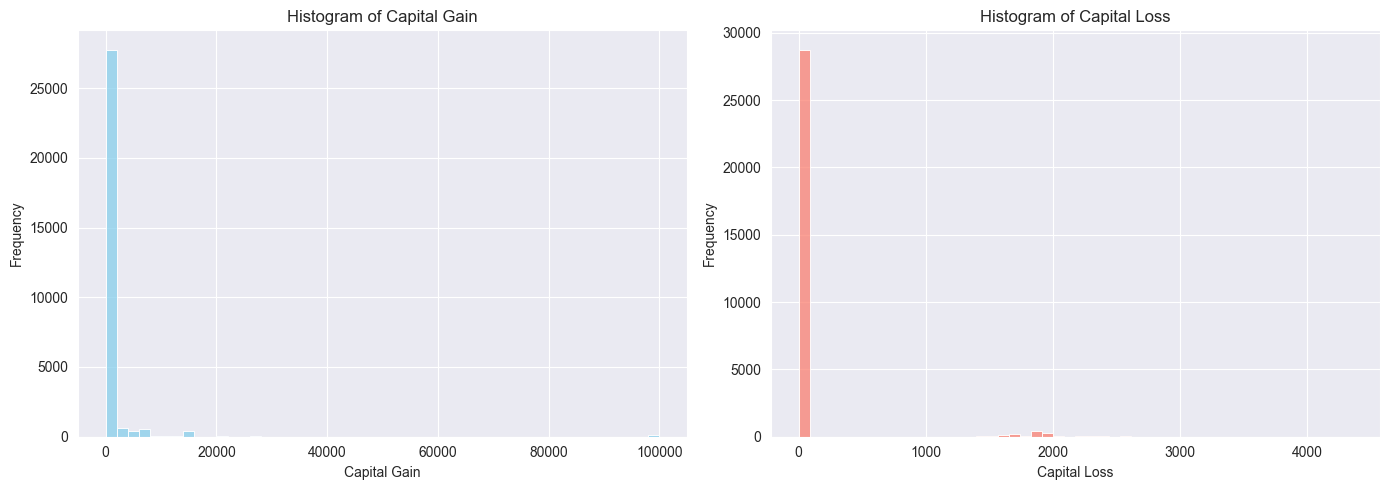

Total Records: 30162
Capital Gain = 0: 27624 (91.59%) 
Capital Loss = 0: 28735 (95.27%) 


In [10]:
if __name__ == "__main__":
    cleaned_df = clean_data()
    analyze_capital(cleaned_df)

### Comparison and Analysis of Capital Gain/Loss:

1. Difference from other variables: Unlike other continuous attributes in the dataset (such as Age or Hours-per-week), which typically show a spread-out distribution across their range, Capital Gain and Capital Loss exhibit extreme sparsity and positive skewness (right-skewed). Most other variables reflect common demographic characteristics possessed by every individual, whereas capital income is an event-driven attribute that applies to very few people.

2. Justification based on Histograms: The histograms for both columns validate this observation:

* Peak at Zero: The visualizations show an overwhelming frequency count concentrated at the single bin representing 0. This confirms that the vast majority of the population (likely >90%) has zero capital gain or loss.

* Long Tail: The non-zero values form a very long, thin tail extending to the right (up to 99,999 for Gain). This "heavy-tailed" distribution indicates that while rare, the values can be extremely large compared to the mean.

### Conclusion: 
This extreme imbalance makes these two columns distinct outliers compared to the rest of the dataset. Such distributions can negatively impact distance-based algorithms (like K-Means), justifying the need for the normalization (Z-transform) requested in the subsequent Task 1.2.

